In [2]:
##Importing packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

df = pd.read_csv ("C:/Users/Jess/Documents/School Work/DSO110C/CropsMergedDataR.csv")
print (df)

    Crops  Year     Tonnes   USD1000  TempChange
0       1  1999  239548580  17247498       0.755
1       1  2000  251853900  18385335       1.000
2       1  2001  241376650  18827379       0.784
3       1  2002  227766880  20726786       0.953
4       1  2003  256229020  24341757       0.992
..    ...   ...        ...       ...         ...
58      3  2015   55839540  10051117       1.534
59      3  2016   62831507   8984906       2.229
60      3  2017   47379810   8196707       1.437
61      3  2018   51305540   9696747       1.278
62      3  2019   52580890   8727023       1.040

[63 rows x 5 columns]


In [ ]:
##Need to recode Year so it isn't a value

In [3]:
##Double checking datatypes

In [4]:
df.dtypes

Crops           int64
Year            int64
Tonnes          int64
USD1000         int64
TempChange    float64
dtype: object

In [5]:
##Testing for Linearity and Normality

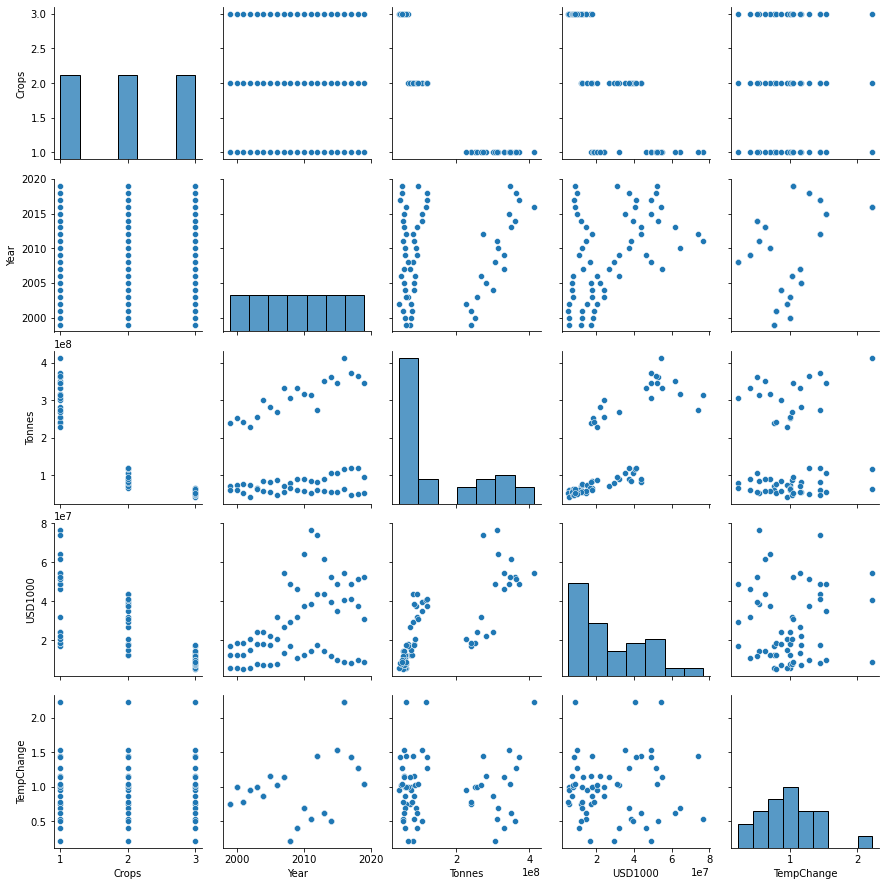

In [6]:
sns.pairplot(df)

C:\Users\Jess\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tonnes', ylabel='Density'>

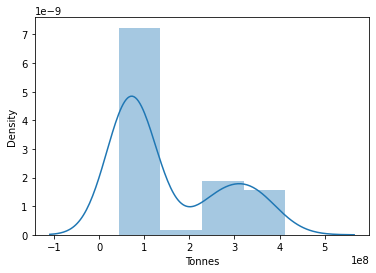

In [7]:
sns.distplot(df['Tonnes'])

In [8]:
##Data looks Positively Skewed

In [10]:
df['TonnesSQRT'] = np.sqrt(df['Tonnes'])

<AxesSubplot:>

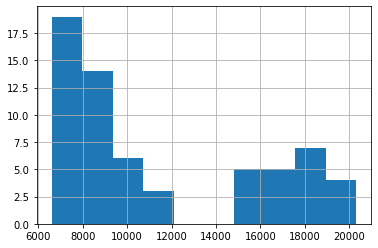

In [13]:
df.TonnesSQRT.hist()


In [15]:
df['TonnesLOG'] = np.log(df['Tonnes'])

<AxesSubplot:>

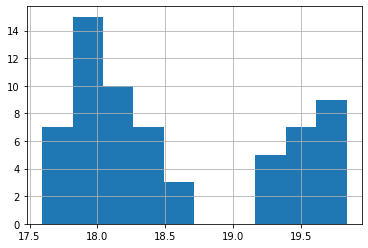

In [16]:
df.TonnesLOG.hist()

In [23]:
##Squared just to scratch an itch

In [24]:
df['TonnesSQ'] = df['Tonnes']**2

<AxesSubplot:>

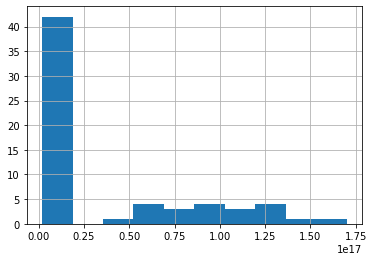

In [25]:
df.TonnesSQ.hist()

In [26]:
from scipy import stats
from scipy.stats import boxcox

In [27]:
df['TonnesLOG1'] = boxcox(df['Tonnes'],0)

<AxesSubplot:>

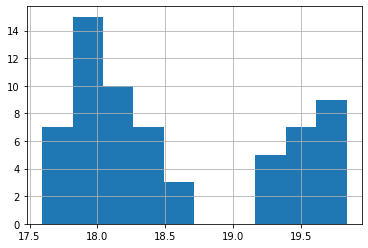

In [28]:
df.TonnesLOG1.hist()

In [29]:
##Testing USD1000  

C:\Users\Jess\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='USD1000', ylabel='Density'>

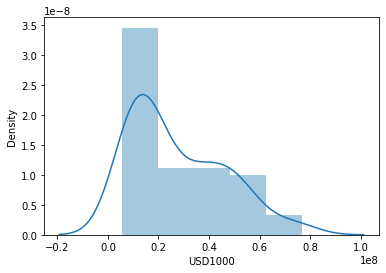

In [30]:
sns.distplot(df['USD1000'])


In [33]:
##Testing TempChange

C:\Users\Jess\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TempChange', ylabel='Density'>

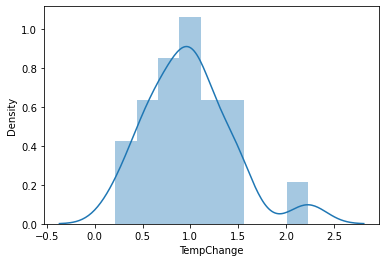

In [34]:
sns.distplot(df['TempChange'])


In [35]:
##USD1000 and Tonnes are positvely skewed and will need transformation

In [36]:
##Test for Homoscedasticity

In [37]:
x = df['TempChange']
y = df['USD1000']

In [38]:
model = sm.OLS(y,x).fit()

In [39]:
pred_val = model.fittedvalues.copy()
true_val = df['USD1000'].values.copy()
residual = true_val - pred_val

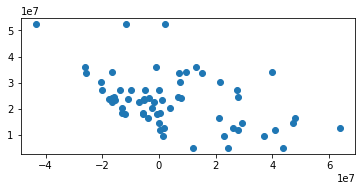

In [40]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [41]:
sms.diagnostic.het_breuschpagan(residual, df[['TempChange']])

(11.201758630151698, nan, 13.407965535171208, 0.0005200471386147321)

In [42]:
##Looks like we violated

In [43]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-0.9457464630589084, pvalue=0.3481351838121759)

In [44]:
##We didn't violate here?

In [45]:
x = df['TempChange']
y = df['Tonnes']

In [46]:
model = sm.OLS(y,x).fit()

In [47]:
pred_val = model.fittedvalues.copy()
true_val = df['Tonnes'].values.copy()
residual = true_val - pred_val

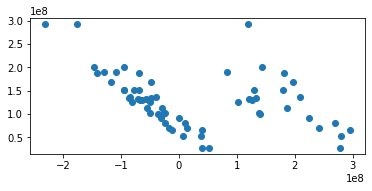

In [48]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [49]:
sms.diagnostic.het_breuschpagan(residual, df[['TempChange']])

(19.203203540573764, nan, 27.184605171260756, 2.253229869934278e-06)

In [ ]:
##We violated here

In [50]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-4.257799078868348, pvalue=7.50905551535376e-05)

In [ ]:
##And here